In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
plt.style.use('seaborn')
import statsmodels.api as sm

In [22]:
stocks = ['TATAMOTORS.BO','TCS.BO','HDFCBANK.BO','ICICIBANK.BO','INFY.BO','^BSESN'] 
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 12, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')
port

[*********************100%***********************]  6 of 6 completed


Adj Close                                                       \
            HDFCBANK.BO ICICIBANK.BO      INFY.BO TATAMOTORS.BO       TCS.BO   
Date                                                                           
2012-01-02   197.660110   109.728600   272.683502    176.598038   479.342621   
2012-01-03   203.189224   114.289803   278.492310    186.302292   486.848694   
2012-01-04   205.086227   117.062737   277.486023    192.595612   477.776367   
2012-01-05   204.762375   117.732353   275.993744    193.652512   476.983093   
2012-01-06   209.366119   118.378319   275.191772    195.189819   476.372711   
...                 ...          ...          ...           ...          ...   
2021-11-24  1500.892456   755.666382  1661.554810    488.700012  3396.724121   
2021-11-25  1506.724609   746.421875  1685.976440    492.750000  3398.647461   
2021-11-26  1472.967285   717.644470  1654.654053    460.250000  3398.795166   
2021-11-29  1483.939697   713.916870  1660.918579    461.250000  3453.096680   
2021-11-30  1476.427002   710.040100  1678.145874    458.799988  3483.971191   

                                Close                                          \
                  ^BSESN  HDFCBANK.BO ICICIBANK.BO      INFY.BO TATAMOTORS.BO   
Date                                                                            
2012-01-02           NaN   213.600006   126.627274   350.606262    181.854156   
2012-01-03  15939.360352   219.574997   131.890915   358.075012    191.847229   
2012-01-04  15882.639648   221.625000   135.090912   356.781250    198.327896   
2012-01-05  15857.080078   221.274994   135.863632   354.862488    199.416245   
2012-01-06  15867.730469   226.250000   136.609085   353.831238    200.999313   
...                  ...          ...          ...          ...           ...   
2021-11-24  58340.988281  1518.349976   760.200012  1697.500000    488.700012   
2021-11-25  58795.089844  1524.250000   750.900024  1722.449951    492.750000   
2021-11-26  57107.148438  1490.099976   721.950012  1690.449951    460.250000   
2021-11-29  57260.578125  1501.199951   718.200012  1696.849976    461.250000   
2021-11-30  57064.871094  1493.599976   714.299988  1714.449951    458.799988   

            ...         Open                                           \
            ...      INFY.BO TATAMOTORS.BO       TCS.BO        ^BSESN   
Date        ...                                                         
2012-01-02  ...   345.487488    180.073212   577.575012           NaN   
2012-01-03  ...   353.125000    184.080338   591.150024  15640.559570   
2012-01-04  ...   356.750000    191.055710   601.000000  15967.490234   
2012-01-05  ...   355.000000    198.674179   586.000000  15893.070312   
2012-01-06  ...   354.862488    197.387955   580.525024  15789.080078   
...         ...          ...           ...          ...           ...   
2021-11-24  ...  1740.000000    499.649994  3478.000000  58839.320312   
2021-11-25  ...  1700.000000    491.100006  3462.000000  58363.929688   
2021-11-26  ...  1705.449951    485.049988  3440.000000  58254.789062   
2021-11-29  ...  1680.000000    454.200012  3445.649902  57028.039062   
2021-11-30  ...  1700.000000    465.549988  3500.000000  57272.078125   

                Volume                                                       
           HDFCBANK.BO ICICIBANK.BO  INFY.BO TATAMOTORS.BO  TCS.BO   ^BSESN  
Date                                                                         
2012-01-02      404988      2515480  1022608       1901735  301766      NaN  
2012-01-03      354344      2866270  1538208       2470250  509242  16200.0  
2012-01-04      440142      3989573  1185912       3652703  205780  17800.0  
2012-01-05      302662      2868877   980712       2986223  203192  21200.0  
2012-01-06      348306      2994838  1591440       2177172  206840  17200.0  
...                ...          ...      ...           ...     ...      ...  
2021-11-24      156241       5102

In [23]:
port_close = port['Close']
port_close

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,TATAMOTORS.BO,TCS.BO,^BSESN
Date,,,,,,
2012-01-02,213.600006,126.627274,350.606262,181.854156,589.125000,NaN
2012-01-03,219.574997,131.890915,358.075012,191.847229,598.349976,15939.360352
2012-01-04,221.625000,135.090912,356.781250,198.327896,587.200012,15882.639648
2012-01-05,221.274994,135.863632,354.862488,199.416245,586.224976,15857.080078
2012-01-06,226.250000,136.609085,353.831238,200.999313,585.474976,15867.730469
...,...,...,...,...,...,...
2021-11-24,1518.349976,760.200012,1697.500000,488.700012,3443.550049,58340.988281
2021-11-25,1524.250000,750.900024,1722.449951,492.750000,3445.500000,58795.089844
2021-11-26,1490.099976,721.950012,1690.449951,460.250000,3445.649902,57107.148438


In [24]:
port=port.dropna()

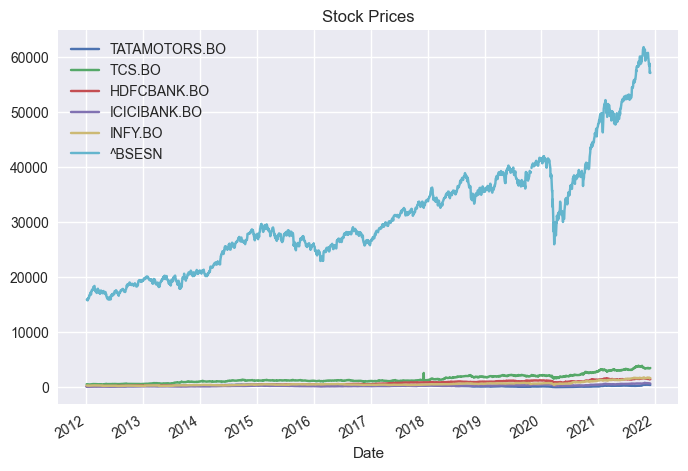

In [25]:
port_close.loc[:,['TATAMOTORS.BO','TCS.BO','HDFCBANK.BO','ICICIBANK.BO','INFY.BO','^BSESN']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

In [26]:
port_close.corr()

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,TATAMOTORS.BO,TCS.BO,^BSESN
HDFCBANK.BO,1.000000,0.909751,0.862759,-0.362194,0.937348,0.970316
ICICIBANK.BO,0.909751,1.000000,0.925127,-0.223293,0.941918,0.958718
INFY.BO,0.862759,0.925127,1.000000,-0.208487,0.962040,0.929429
TATAMOTORS.BO,-0.362194,-0.223293,-0.208487,1.000000,-0.310478,-0.204407
TCS.BO,0.937348,0.941918,0.962040,-0.310478,1.000000,0.969199
^BSESN,0.970316,0.958718,0.929429,-0.204407,0.969199,1.000000


In [27]:
returns = port_close.pct_change()
returns.dropna(inplace=True)
returns

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,TATAMOTORS.BO,TCS.BO,^BSESN
Date,,,,,,
2012-01-04,0.009336,0.024262,-0.003613,0.033780,-0.018635,-0.003559
2012-01-05,-0.001579,0.005720,-0.005378,0.005488,-0.001660,-0.001609
2012-01-06,0.022483,0.005487,-0.002906,0.007939,-0.001279,0.000672
2012-01-09,0.005304,-0.007453,0.001961,-0.013291,0.000598,-0.003341
2012-01-10,0.010002,0.038485,0.009449,0.022449,-0.004139,0.022155
...,...,...,...,...,...,...
2021-11-24,0.001022,0.011106,-0.020061,-0.013524,-0.005817,-0.005512
2021-11-25,0.003886,-0.012234,0.014698,0.008287,0.000566,0.007784
2021-11-26,-0.022404,-0.038554,-0.018578,-0.065956,0.000044,-0.028709


In [28]:
import pandas as pd
df = pd.read_csv(r'/Users/kratikaaggarwal/Downloads/2022-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv')
print(df)

            Date       SMB       HML       WML        MF        RF
0     1993-10-01  1.557011  1.242265 -0.439199       NaN       NaN
1     1993-10-04  0.441723  0.342366 -0.604401 -0.943991  0.022014
2     1993-10-05  0.020237  0.882847 -0.839673 -0.297380  0.022014
3     1993-10-06 -0.058198 -1.644238  0.152324 -0.324258  0.022014
4     1993-10-07 -0.305982  0.227731 -0.055639  0.396895  0.022014
...          ...       ...       ...       ...       ...       ...
7068  2022-03-25  0.087792 -0.035763  0.914173 -0.307918  0.010209
7069  2022-03-28 -0.888770 -0.045665  0.179171  0.032264  0.030631
7070  2022-03-29  0.383918 -1.480737 -0.505562  0.519493  0.010209
7071  2022-03-30  1.554316 -1.212277 -0.074146  0.558524  0.010209
7072  2022-03-31 -0.047029  0.377510 -0.032123  0.118689  0.010317

[7073 rows x 6 columns]


In [29]:
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.set_index(['Datetime'])
del df['Date']
df

,SMB,HML,WML,MF,RF
Datetime,,,,,
1993-10-01,1.557011,1.242265,-0.439199,NaN,NaN
1993-10-04,0.441723,0.342366,-0.604401,-0.943991,0.022014
1993-10-05,0.020237,0.882847,-0.839673,-0.297380,0.022014
1993-10-06,-0.058198,-1.644238,0.152324,-0.324258,0.022014
1993-10-07,-0.305982,0.227731,-0.055639,0.396895,0.022014
...,...,...,...,...,...
2022-03-25,0.087792,-0.035763,0.914173,-0.307918,0.010209
2022-03-28,-0.888770,-0.045665,0.179171,0.032264,0.030631
2022-03-29,0.383918,-1.480737,-0.505562,0.519493,0.010209


In [30]:
df=df[df.index.year.isin(range(2012,2022))]

In [31]:
df

,SMB,HML,WML,MF,RF
Datetime,,,,,
2012-01-02,0.155622,0.812248,0.291455,-0.166654,0.066863
2012-01-03,-0.171824,0.810439,-3.536847,2.623072,0.022283
2012-01-04,-0.230901,0.356510,-3.009292,0.226935,0.022283
2012-01-05,0.363531,0.295083,-0.547696,-0.151992,0.022283
2012-01-06,-0.153447,0.503555,-1.122855,-0.031118,0.022389
...,...,...,...,...,...
2021-12-27,0.442537,-0.138670,0.401773,0.336824,0.029864
2021-12-28,0.618713,1.123667,0.558087,1.116567,0.009954
2021-12-29,1.037100,-0.527629,-0.289997,0.059762,0.009954


In [34]:
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - df['RF']

In [45]:
c_df = returns.join(df)
c_df

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,TATAMOTORS.BO,TCS.BO,^BSESN,excess_return_HDFCBANK.BO,excess_return_ICICIBANK.BO,excess_return_INFY.BO,excess_return_TATAMOTORS.BO,...,excess_return_excess_return_ICICIBANK.BO,excess_return_excess_return_INFY.BO,excess_return_excess_return_TATAMOTORS.BO,excess_return_excess_return_TCS.BO,excess_return_excess_return_^BSESN,SMB,HML,WML,MF,RF
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,0.009336,0.024262,-0.003613,0.033780,-0.018635,-0.003559,-0.012947,0.001980,-0.025896,0.011498,...,-0.020303,-0.048179,-0.010785,-0.063200,-0.048124,-0.230901,0.356510,-3.009292,0.226935,0.022283
2012-01-05,-0.001579,0.005720,-0.005378,0.005488,-0.001660,-0.001609,-0.023862,-0.016563,-0.027661,-0.016795,...,-0.038846,-0.049944,-0.039078,-0.046226,-0.046175,0.363531,0.295083,-0.547696,-0.151992,0.022283
2012-01-06,0.022483,0.005487,-0.002906,0.007939,-0.001279,0.000672,0.000095,-0.016902,-0.025295,-0.014450,...,-0.039290,-0.047683,-0.036839,-0.046057,-0.044106,-0.153447,0.503555,-1.122855,-0.031118,0.022389
2012-01-09,0.005304,-0.007453,0.001961,-0.013291,0.000598,-0.003341,-0.039478,-0.052235,-0.042822,-0.058073,...,-0.097018,-0.087604,-0.102855,-0.088967,-0.092905,0.825155,0.643023,-2.607473,0.316147,0.044782
2012-01-10,0.010002,0.038485,0.009449,0.022449,-0.004139,0.022155,-0.012386,0.016096,-0.012939,0.000061,...,-0.006292,-0.035328,-0.022328,-0.048917,-0.022623,0.200981,1.251512,-2.359033,1.832401,0.022389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,0.001022,0.011106,-0.020061,-0.013524,-0.005817,-0.005512,-0.008456,0.001628,-0.029538,-0.023002,...,-0.007850,-0.039016,-0.032480,-0.024773,-0.024467,0.525582,1.851334,0.591769,-0.422061,0.009478
2021-11-25,0.003886,-0.012234,0.014698,0.008287,0.000566,0.007784,-0.005613,-0.021732,0.005200,-0.001211,...,-0.031230,-0.004299,-0.010710,-0.018431,-0.011213,0.620250,-0.270830,0.326853,1.010703,0.009498
2021-11-26,-0.022404,-0.038554,-0.018578,-0.065956,0.000044,-0.028709,-0.031903,-0.048052,-0.028077,-0.075455,...,-0.057551,-0.037575,-0.084953,-0.018953,-0.047706,1.083319,-0.776310,-1.259804,-2.581580,0.009498


In [46]:
c_df=c_df.drop(['MF'], axis=1)
c_df=c_df.dropna()
c_df

,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,TATAMOTORS.BO,TCS.BO,^BSESN,excess_return_HDFCBANK.BO,excess_return_ICICIBANK.BO,excess_return_INFY.BO,excess_return_TATAMOTORS.BO,...,excess_return_excess_return_HDFCBANK.BO,excess_return_excess_return_ICICIBANK.BO,excess_return_excess_return_INFY.BO,excess_return_excess_return_TATAMOTORS.BO,excess_return_excess_return_TCS.BO,excess_return_excess_return_^BSESN,SMB,HML,WML,RF
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,0.009336,0.024262,-0.003613,0.033780,-0.018635,-0.003559,-0.012947,0.001980,-0.025896,0.011498,...,-0.035229,-0.020303,-0.048179,-0.010785,-0.063200,-0.048124,-0.230901,0.356510,-3.009292,0.022283
2012-01-05,-0.001579,0.005720,-0.005378,0.005488,-0.001660,-0.001609,-0.023862,-0.016563,-0.027661,-0.016795,...,-0.046145,-0.038846,-0.049944,-0.039078,-0.046226,-0.046175,0.363531,0.295083,-0.547696,0.022283
2012-01-06,0.022483,0.005487,-0.002906,0.007939,-0.001279,0.000672,0.000095,-0.016902,-0.025295,-0.014450,...,-0.022294,-0.039290,-0.047683,-0.036839,-0.046057,-0.044106,-0.153447,0.503555,-1.122855,0.022389
2012-01-09,0.005304,-0.007453,0.001961,-0.013291,0.000598,-0.003341,-0.039478,-0.052235,-0.042822,-0.058073,...,-0.084261,-0.097018,-0.087604,-0.102855,-0.088967,-0.092905,0.825155,0.643023,-2.607473,0.044782
2012-01-10,0.010002,0.038485,0.009449,0.022449,-0.004139,0.022155,-0.012386,0.016096,-0.012939,0.000061,...,-0.034775,-0.006292,-0.035328,-0.022328,-0.048917,-0.022623,0.200981,1.251512,-2.359033,0.022389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,0.001022,0.011106,-0.020061,-0.013524,-0.005817,-0.005512,-0.008456,0.001628,-0.029538,-0.023002,...,-0.017934,-0.007850,-0.039016,-0.032480,-0.024773,-0.024467,0.525582,1.851334,0.591769,0.009478
2021-11-25,0.003886,-0.012234,0.014698,0.008287,0.000566,0.007784,-0.005613,-0.021732,0.005200,-0.001211,...,-0.015111,-0.031230,-0.004299,-0.010710,-0.018431,-0.011213,0.620250,-0.270830,0.326853,0.009498
2021-11-26,-0.022404,-0.038554,-0.018578,-0.065956,0.000044,-0.028709,-0.031903,-0.048052,-0.028077,-0.075455,...,-0.041401,-0.057551,-0.037575,-0.084953,-0.018953,-0.047706,1.083319,-0.776310,-1.259804,0.009498


In [47]:
c_df.isnull().sum()

HDFCBANK.BO                                  0
ICICIBANK.BO                                 0
INFY.BO                                      0
TATAMOTORS.BO                                0
TCS.BO                                       0
^BSESN                                       0
excess_return_HDFCBANK.BO                    0
excess_return_ICICIBANK.BO                   0
excess_return_INFY.BO                        0
excess_return_TATAMOTORS.BO                  0
excess_return_TCS.BO                         0
excess_return_^BSESN                         0
excess_return_excess_return_HDFCBANK.BO      0
excess_return_excess_return_ICICIBANK.BO     0
excess_return_excess_return_INFY.BO          0
excess_return_excess_return_TATAMOTORS.BO    0
excess_return_excess_return_TCS.BO           0
excess_return_excess_return_^BSESN           0
SMB                                          0
HML                                          0
WML                                          0
RF           

In [37]:
c_df=c_df.dropna()

In [48]:
import statsmodels.api as sm

In [49]:
y_HDFCBANK_NS = c_df['excess_return_HDFCBANK.BO']
X = c_df['excess_return_^BSESN']
X = sm.add_constant(X, prepend=False)
capm_HDFCBANK_NS = sm.OLS(y_HDFCBANK_NS, X)
capm_result_HDFCBANK_NS = capm_HDFCBANK_NS.fit()
capm_result_HDFCBANK_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     excess_return_HDFCBANK.BO   R-squared:                       0.822
Model:                                   OLS   Adj. R-squared:                  0.822
Method:                        Least Squares   F-statistic:                 1.125e+04
Date:                       Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                               12:47:37   Log-Likelihood:                 7836.4
No. Observations:                       2438   AIC:                        -1.567e+04
Df Residuals:                           2436   BIC:                        -1.566e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
excess_return_^BSESN     1.0053      0.009    106.055      0.000       0.987       1.024
const                    0.0004      0.000      1.442      0.149      -0.000       0.001
==============================================================================
Omnibus:                      203.386   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1216.606
Skew:                           0.062   Prob(JB):                    6.57e-265
Kurtosis:                       6.458   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
y_ICICIBANK_NS = c_df['excess_return_ICICIBANK.BO']
X = c_df['excess_return_^BSESN']
X = sm.add_constant(X, prepend=False)
capm_ICICIBANK_NS = sm.OLS(y_ICICIBANK_NS, X)
capm_result_ICICIBANK_NS = capm_ICICIBANK_NS.fit()
capm_result_ICICIBANK_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     excess_return_ICICIBANK.BO   R-squared:                       0.701
Model:                                    OLS   Adj. R-squared:                  0.701
Method:                         Least Squares   F-statistic:                     5712.
Date:                        Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                                12:47:39   Log-Likelihood:                 6740.5
No. Observations:                        2438   AIC:                        -1.348e+04
Df Residuals:                            2436   BIC:                        -1.347e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
excess_return_^BSESN     1.1230      0.015     75.577      0.000       1.094       1.152
const                    0.0034      0.000      7.090      0.000       0.002       0.004
==============================================================================
Omnibus:                      561.814   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3527.684
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       8.588   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
y_INFY_NS = c_df['excess_return_INFY.BO']
X = c_df['excess_return_^BSESN']
X = sm.add_constant(X, prepend=False)
capm_INFY_NS = sm.OLS(y_INFY_NS, X)
capm_result_INFY_NS = capm_INFY_NS.fit()
capm_result_INFY_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     excess_return_INFY.BO   R-squared:                       0.585
Model:                               OLS   Adj. R-squared:                  0.585
Method:                    Least Squares   F-statistic:                     3441.
Date:                   Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                           12:47:41   Log-Likelihood:                 6591.1
No. Observations:                   2438   AIC:                        -1.318e+04
Df Residuals:                       2436   BIC:                        -1.317e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
excess_return_^BSESN     0.9267      0.016     58.659      0.000       0.896       0.958
const                   -0.0016      0.001     -3.152      0.002      -0.003      -0.001
==============================================================================
Omnibus:                      781.882   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51937.422
Skew:                          -0.641   Prob(JB):                         0.00
Kurtosis:                      25.575   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
y_RELIANCE_NS = c_df['excess_return_TATAMOTORS.BO']
X = c_df['excess_return_^BSESN']
X = sm.add_constant(X, prepend=False)
capm_RELIANCE_NS = sm.OLS(y_RELIANCE_NS, X)
capm_result_RELIANCE_NS = capm_RELIANCE_NS.fit()
capm_result_RELIANCE_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     excess_return_TATAMOTORS.BO   R-squared:                       0.497
Model:                                     OLS   Adj. R-squared:                  0.497
Method:                          Least Squares   F-statistic:                     2409.
Date:                         Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                                 12:48:05   Log-Likelihood:                 5760.3
No. Observations:                         2438   AIC:                        -1.152e+04
Df Residuals:                             2436   BIC:                        -1.150e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
excess_return_^BSESN     1.0902      0.022     49.078      0.000       1.047       1.134
const                    0.0024      0.001      3.317      0.001       0.001       0.004
==============================================================================
Omnibus:                      603.015   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8270.535
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                      11.888   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y_TCS_NS = c_df['excess_return_TCS.BO']
X = c_df['excess_return_^BSESN']
X = sm.add_constant(X, prepend=False)
capm_TCS_NS = sm.OLS(y_TCS_NS, X)
capm_result_TCS_NS = capm_TCS_NS.fit()
capm_result_TCS_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     excess_return_TCS.BO   R-squared:                       0.310
Model:                              OLS   Adj. R-squared:                  0.309
Method:                   Least Squares   F-statistic:                     1093.
Date:                  Sun, 30 Oct 2022   Prob (F-statistic):          2.92e-198
Time:                          12:48:17   Log-Likelihood:                 5330.8
No. Observations:                  2438   AIC:                        -1.066e+04
Df Residuals:                      2436   BIC:                        -1.065e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
excess_return_^BSESN     0.8757      0.026     33.054      0.000       0.824       0.928
const                   -0.0027      0.001     -3.072      0.002      -0.004      -0.001
==============================================================================
Omnibus:                     5230.829   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66933714.891
Skew:                          17.919   Prob(JB):                         0.00
Kurtosis:                     813.938   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
betas = [capm_result_RELIANCE_NS.params[0],
         capm_result_TCS_NS.params[0],
         capm_result_HDFCBANK_NS.params[0],
         capm_result_ICICIBANK_NS.params[0],
         capm_result_INFY_NS.params[0]
        ]
betas

[1.0901938588626068,
 0.8756599473973011,
 1.0053432280247883,
 1.1230046840436192,
 0.9267325278655292]

In [58]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    print(asset_ret)
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [61]:
rf = c_df['RF'].mean()
rm = c_df['^BSESN'].mean()

[-0.0016924741580119432, 0.003714556874835729, 0.00044606883951775825, -0.0025194257049973925, 0.0024273429997277926]


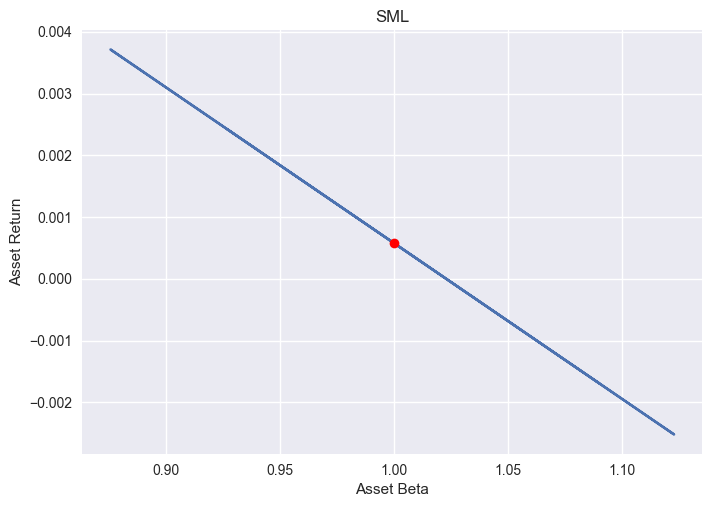

In [62]:
SML(rf, rm,betas)

In [49]:
ret_exp = [-0.0002506285156984277, 0.0035178672636543007, 0.00044100002003701413, -0.002809894176485035, 0.002460335389970817]

In [50]:
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas', 'Expected_Return']
df_all.index = returns.columns[:5]
df_all

,betas,Expected_Return
HDFCBANK.NS,1.032921,-0.000251
ICICIBANK.NS,0.883409,0.003518
INFY.NS,1.005481,0.000441
RELIANCE.NS,1.134458,-0.002810
TCS.NS,0.925365,0.002460


In [51]:
def over_under_val(rf, rm, stock):
    x = rf + (rm - rf) * df_all['betas'].loc[stock]# required rate of return(equilibrium)
    y = df_all['Expected_Return'].loc[stock] # expectations
    if x < y:
        print('The stock is underpriced')
    elif x > y:
        print('The stock is overpriced')
    else:
        print('The stock is fairly priced')    


In [54]:
over_under_val(rf, rm, 'RELIANCE.NS')

The stock is fairly priced


In [55]:
over_under_val(rf, rm, 'TCS.NS')

The stock is fairly priced


In [56]:
over_under_val(rf, rm, 'HDFCBANK.NS')

The stock is fairly priced


In [57]:
over_under_val(rf, rm, 'ICICIBANK.NS')

The stock is fairly priced


In [58]:
over_under_val(rf, rm, 'INFY.NS')

The stock is fairly priced


In [60]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_RELIANCE.NS']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                                OLS Regression Results                               
Dep. Variable:     excess_return_RELIANCE.NS   R-squared:                       0.719
Model:                                   OLS   Adj. R-squared:                  0.719
Method:                        Least Squares   F-statistic:                     2078.
Date:                       Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                               16:20:23   Log-Likelihood:                 7036.8
No. Observations:                       2438   AIC:                        -1.407e+04
Df Residuals:                           2434   BIC:                        -1.404e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [61]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_TCS.NS']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                             OLS Regression Results                             
Dep. Variable:     excess_return_TCS.NS   R-squared:                       0.644
Model:                              OLS   Adj. R-squared:                  0.643
Method:                   Least Squares   F-statistic:                     1467.
Date:                  Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                          16:20:53   Log-Likelihood:                 6926.1
No. Observations:                  2438   AIC:                        -1.384e+04
Df Residuals:                      2434   BIC:                        -1.382e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

In [62]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_HDFCBANK.NS']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                                OLS Regression Results                               
Dep. Variable:     excess_return_HDFCBANK.NS   R-squared:                       0.820
Model:                                   OLS   Adj. R-squared:                  0.819
Method:                        Least Squares   F-statistic:                     3685.
Date:                       Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                               16:21:13   Log-Likelihood:                 7812.4
No. Observations:                       2438   AIC:                        -1.562e+04
Df Residuals:                           2434   BIC:                        -1.559e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [63]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_ICICIBANK.NS']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                                OLS Regression Results                                
Dep. Variable:     excess_return_ICICIBANK.NS   R-squared:                       0.713
Model:                                    OLS   Adj. R-squared:                  0.713
Method:                         Least Squares   F-statistic:                     2018.
Date:                        Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                                16:21:55   Log-Likelihood:                 6774.7
No. Observations:                        2438   AIC:                        -1.354e+04
Df Residuals:                            2434   BIC:                        -1.352e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [64]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_INFY.NS']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                              OLS Regression Results                             
Dep. Variable:     excess_return_INFY.NS   R-squared:                       0.606
Model:                               OLS   Adj. R-squared:                  0.606
Method:                    Least Squares   F-statistic:                     1249.
Date:                   Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                           16:22:13   Log-Likelihood:                 6647.1
No. Observations:                   2438   AIC:                        -1.329e+04
Df Residuals:                       2434   BIC:                        -1.326e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons